In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.compose import ColumnTransformer

In [76]:
df = pd.read_csv("./Data/Viral_Social_Media_Trends.csv", na_values=["", "NA", "NULL"])
df.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


In [78]:
print(df.isnull().sum())
print(df.isnull().values.any())

Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64
False


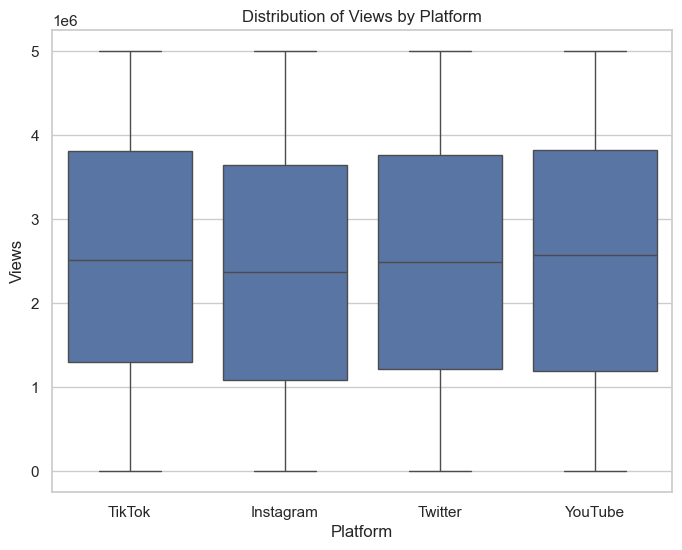

In [79]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='Platform', y='Views', data=df, ax=ax)
ax.set_title('Distribution of Views by Platform')

plt.show()

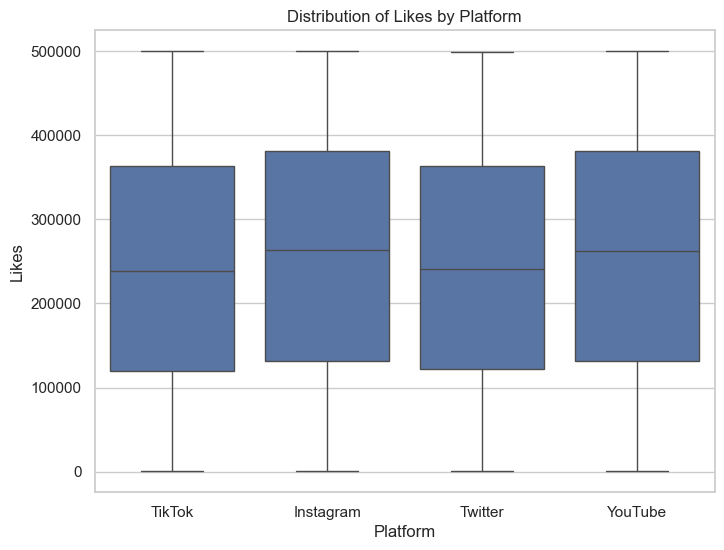

In [80]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='Platform', y='Likes', data=df, ax=ax)
ax.set_title('Distribution of Likes by Platform')

plt.show()


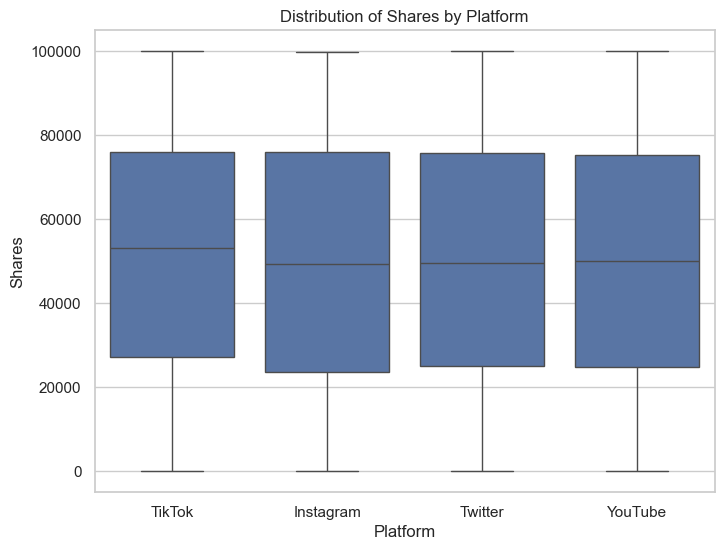

In [81]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='Platform', y='Shares', data=df, ax=ax)
ax.set_title('Distribution of Shares by Platform')

plt.show()


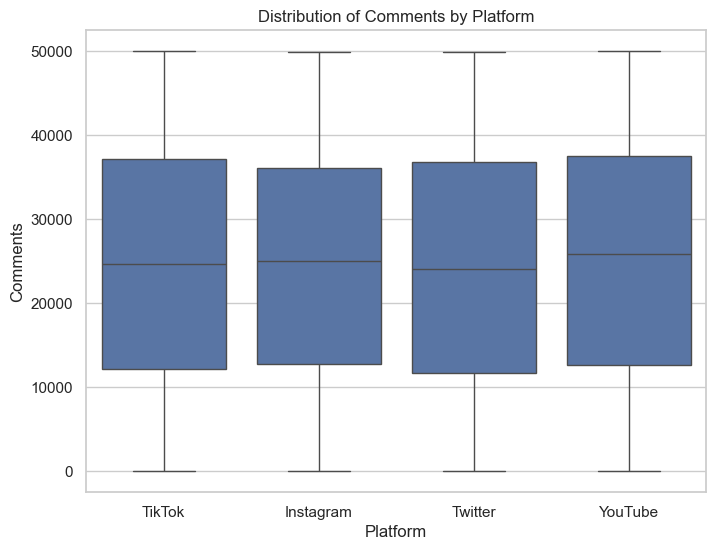

In [82]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='Platform', y='Comments', data=df, ax=ax)
ax.set_title('Distribution of Comments by Platform')
plt.show()

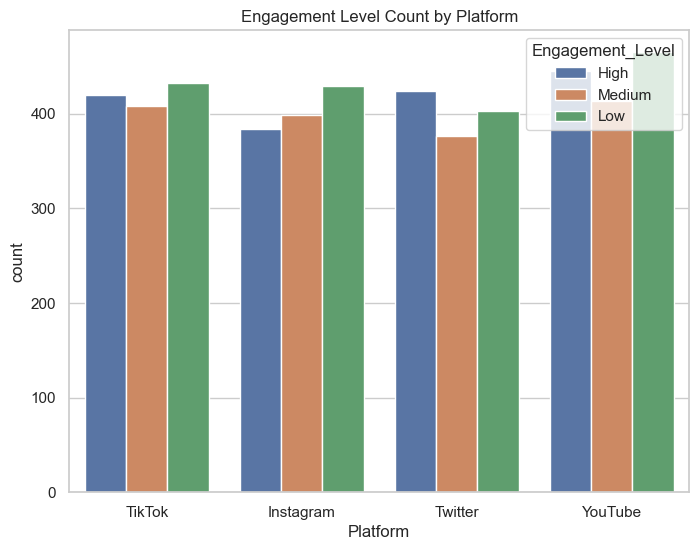

In [83]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x='Platform', hue='Engagement_Level', data=df, ax=ax)
ax.set_title('Engagement Level Count by Platform')
plt.show()

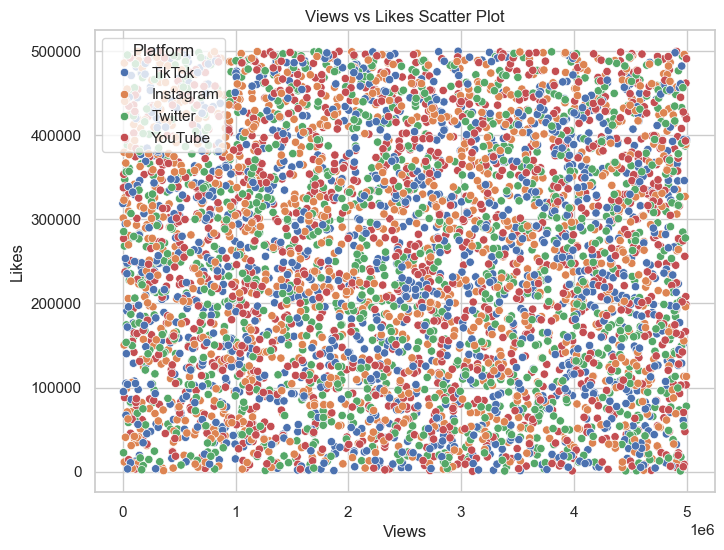

In [84]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(x='Views', y='Likes', hue='Platform',  data=df, ax=ax)
ax.set_title('Views vs Likes Scatter Plot')
plt.show()

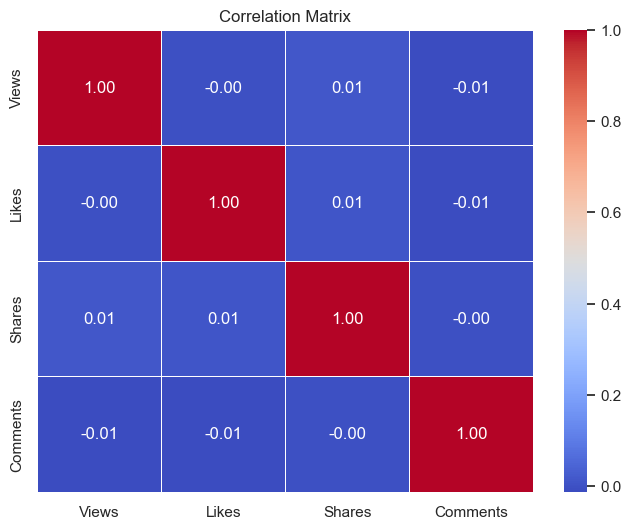

In [85]:
corr_matrix = df[['Views', 'Likes', 'Shares', 'Comments']].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [86]:
print(df.shape)  # Berapa jumlah baris dan kolom?

(5000, 10)


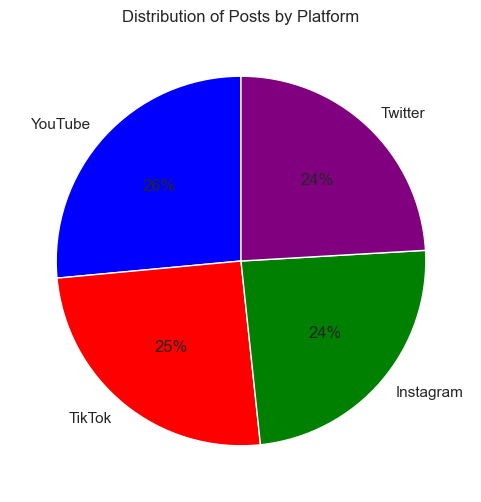

In [87]:
platform_counts = df['Platform'].value_counts()
plt.figure(figsize=(6, 6))  
plt.pie(platform_counts, labels=platform_counts.index, autopct='%.0f%%', startangle=90, colors=['blue', 'red', 'green', 'purple', 'orange'])

plt.title('Distribution of Posts by Platform')
plt.show()

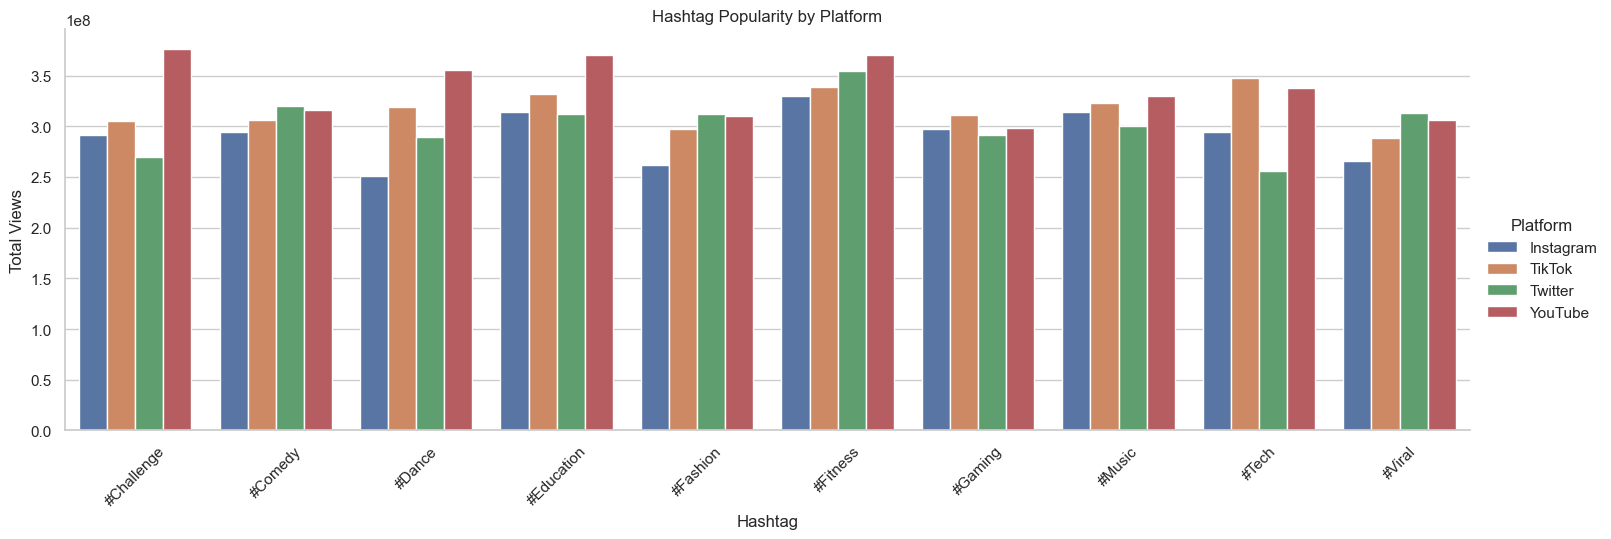

In [88]:
df_grouped = df.groupby(['Hashtag', 'Platform']).sum(numeric_only=True).reset_index()
g = sns.catplot(data=df_grouped, x='Hashtag', y='Views', kind='bar', hue='Platform', aspect=3)

g.set(
    title="Hashtag Popularity by Platform",
    xlabel="Hashtag",
    ylabel="Total Views"
)

plt.xticks(rotation=45)  
plt.show()

C:\Users\ikhwa\AppData\Local\Temp\ipykernel_5376\3229976811.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_counts.index, y=content_counts.values, palette='viridis')


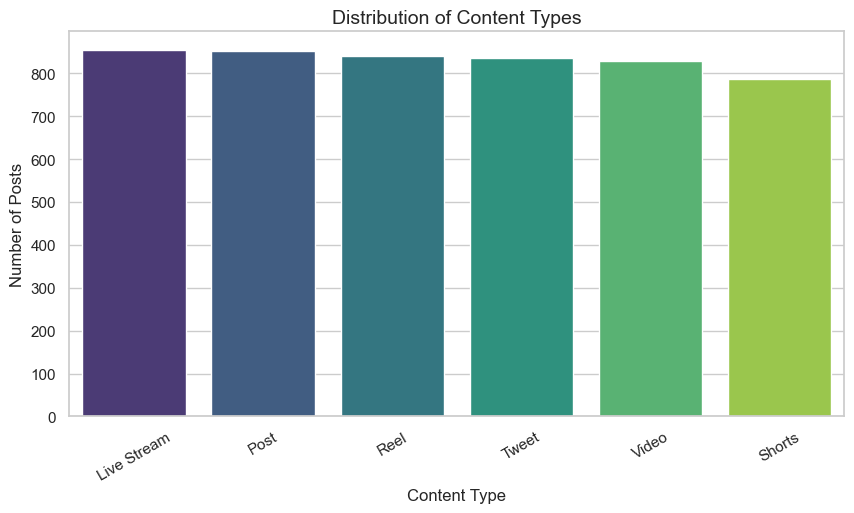

In [89]:
content_counts = df['Content_Type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=content_counts.index, y=content_counts.values, palette='viridis')
plt.title('Distribution of Content Types', fontsize=14)
plt.xlabel('Content Type')
plt.ylabel('Number of Posts')

plt.xticks(rotation=30)
plt.show()

C:\Users\ikhwa\AppData\Local\Temp\ipykernel_5376\101176601.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='coolwarm')


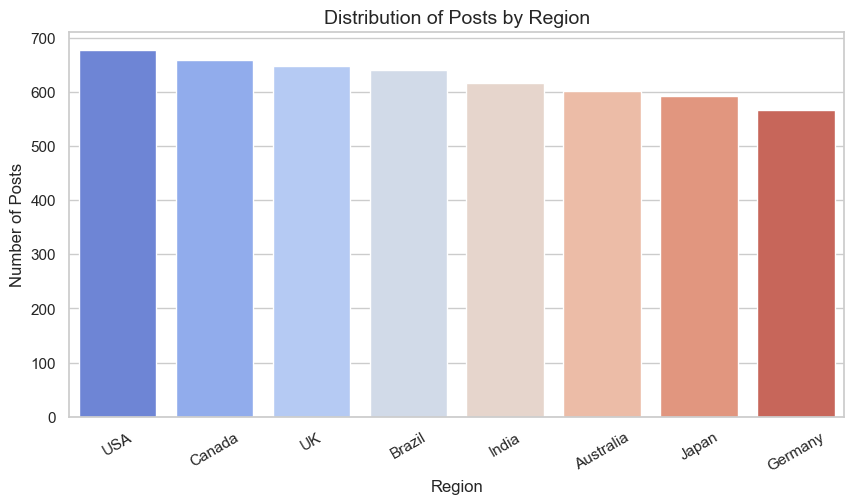

In [90]:
region_counts = df['Region'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='coolwarm')
plt.title('Distribution of Posts by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Number of Posts')

# Rotasi label agar lebih mudah dibaca
plt.xticks(rotation=30)

plt.show()


C:\Users\ikhwa\AppData\Local\Temp\ipykernel_5376\3204891008.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_counts.index, y=hashtag_counts.values, palette='viridis')


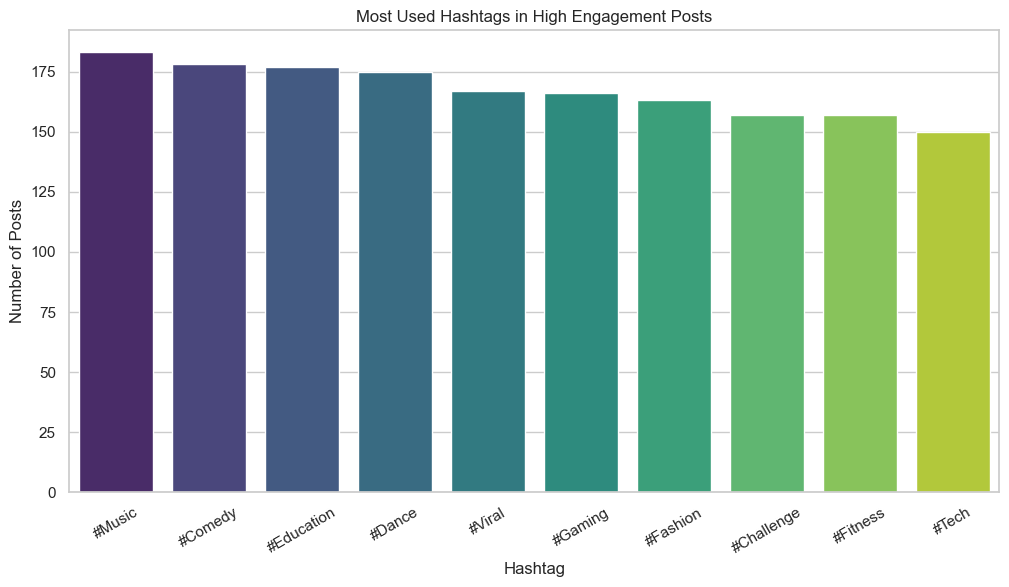

In [91]:
df_high = df[df['Engagement_Level'] == 'High']

# Hitung jumlah post per Hashtag
hashtag_counts = df_high['Hashtag'].value_counts()

# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=hashtag_counts.index, y=hashtag_counts.values, palette='viridis')

plt.title('Most Used Hashtags in High Engagement Posts')
plt.xlabel('Hashtag')
plt.ylabel('Number of Posts')

# Rotasi label agar mudah dibaca
plt.xticks(rotation=30)

plt.show()

C:\Users\ikhwa\AppData\Local\Temp\ipykernel_5376\1165685458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_counts.index, y=hashtag_counts.values, palette='viridis')


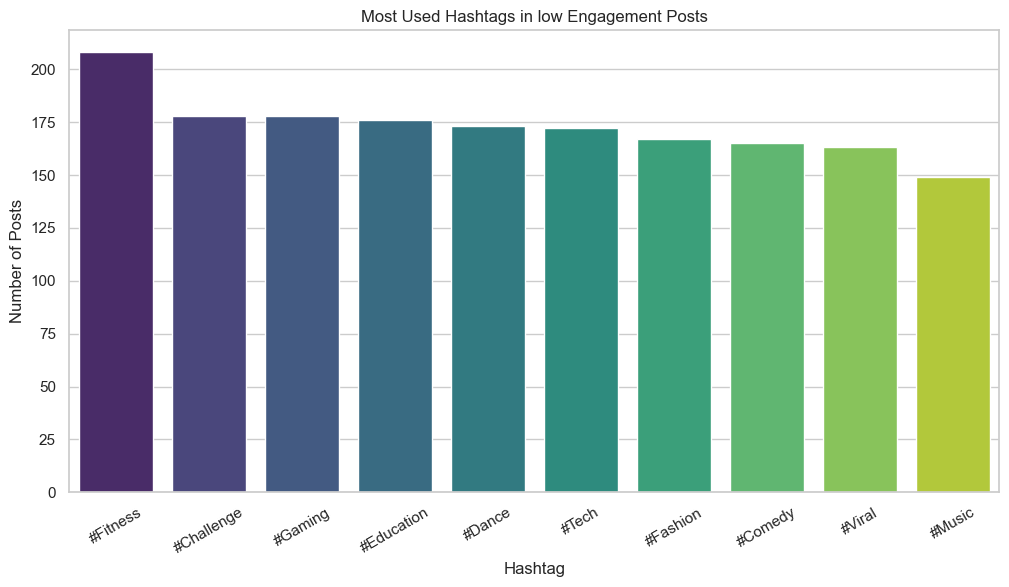

In [92]:
df_high = df[df['Engagement_Level'] == 'Low']

# Hitung jumlah post per Hashtag
hashtag_counts = df_high['Hashtag'].value_counts()

# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=hashtag_counts.index, y=hashtag_counts.values, palette='viridis')

plt.title('Most Used Hashtags in low Engagement Posts')
plt.xlabel('Hashtag')
plt.ylabel('Number of Posts')

# Rotasi label agar mudah dibaca
plt.xticks(rotation=30)

plt.show()

C:\Users\ikhwa\AppData\Local\Temp\ipykernel_5376\3685058244.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_counts.index, y=hashtag_counts.values, palette='viridis')


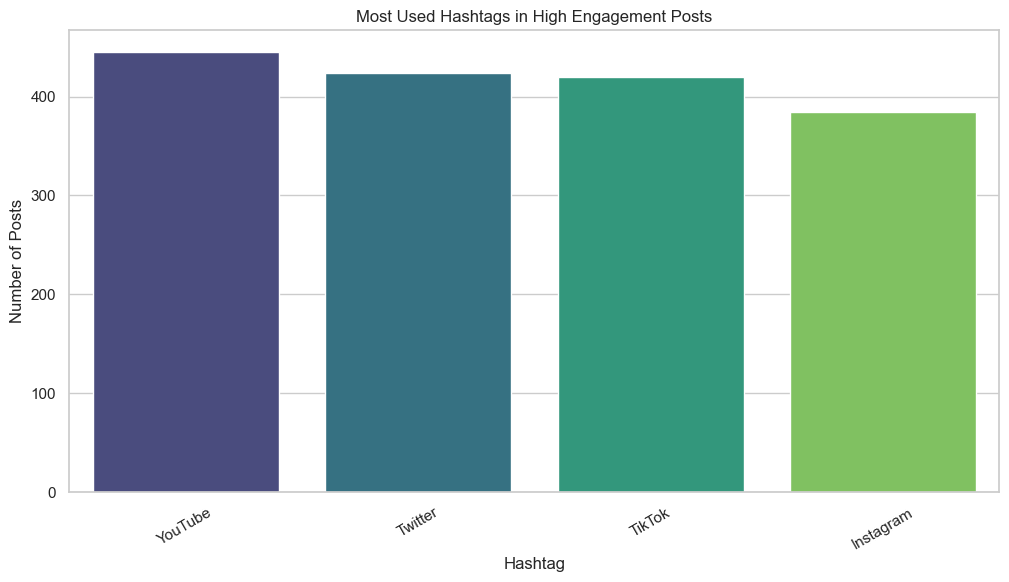

In [93]:
df_high = df[df['Engagement_Level'] == 'High']

# Hitung jumlah post per Hashtag
hashtag_counts = df_high['Platform'].value_counts()

# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=hashtag_counts.index, y=hashtag_counts.values, palette='viridis')

plt.title('Most Used Hashtags in High Engagement Posts')
plt.xlabel('Hashtag')
plt.ylabel('Number of Posts')

# Rotasi label agar mudah dibaca
plt.xticks(rotation=30)

plt.show()

c:\Users\ikhwa\.conda\envs\analysis\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


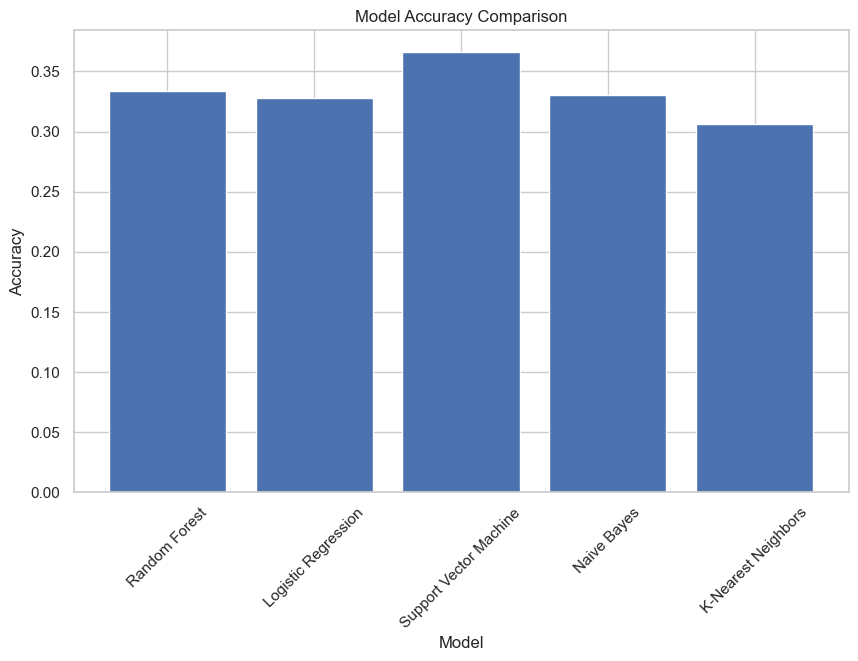

,Model,Accuracy
0,Random Forest,0.334
1,Logistic Regression,0.328
2,Support Vector Machine,0.366
3,Naive Bayes,0.330
4,K-Nearest Neighbors,0.306


In [94]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
X = df.drop('Engagement_Level', axis=1)
y = df['Engagement_Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)

models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

accuracy_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_results[model_name] = accuracy_score(y_test, y_pred)

accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])

plt.figure(figsize=(10, 6))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

accuracy_df

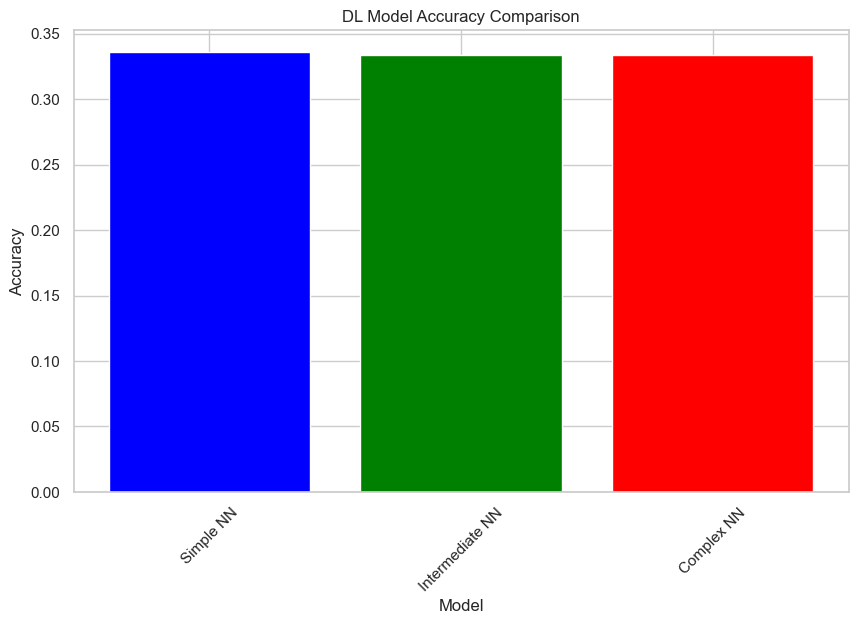

,Model,Accuracy
0,Simple NN,0.336
1,Intermediate NN,0.334
2,Complex NN,0.334


In [95]:
def create_model(input_dim, layers):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    for nodes in layers:
        model.add(Dense(nodes, activation='relu'))
        model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Encode target variable for DL models
y_encoded = LabelEncoder().fit_transform(y)

# Split the dataset for DL models
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

dl_models = {
    'Simple NN': create_model(X_train_dl.shape[1], [32]),
    'Intermediate NN': create_model(X_train_dl.shape[1], [64, 32]),
    'Complex NN': create_model(X_train_dl.shape[1], [128, 64, 32])
}

dl_accuracy_results = {}
for model_name, model in dl_models.items():
    model.fit(X_train_dl, y_train_dl, epochs=10, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X_test_dl, y_test_dl, verbose=0)
    dl_accuracy_results[model_name] = accuracy

dl_accuracy_df = pd.DataFrame(list(dl_accuracy_results.items()), columns=['Model', 'Accuracy'])

plt.figure(figsize=(10, 6))
plt.bar(dl_accuracy_df['Model'], dl_accuracy_df['Accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('DL Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

dl_accuracy_df

## SVM(Support Vector Machine) Model

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Post_ID           5000 non-null   int32
 1   Platform          5000 non-null   int32
 2   Hashtag           5000 non-null   int32
 3   Content_Type      5000 non-null   int32
 4   Region            5000 non-null   int32
 5   Views             5000 non-null   int64
 6   Likes             5000 non-null   int64
 7   Shares            5000 non-null   int64
 8   Comments          5000 non-null   int64
 9   Engagement_Level  5000 non-null   int32
dtypes: int32(6), int64(4)
memory usage: 273.6 KB


In [97]:
df.drop(columns=["Post_ID"], inplace=True)

In [98]:
X = df.drop(columns=["Engagement_Level"])  
y = df["Engagement_Level"]                 

In [99]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd


df_encoded = df.copy()


label_encoder = LabelEncoder()
df_encoded["Engagement_Level"] = label_encoder.fit_transform(df_encoded["Engagement_Level"])


categorical_features = ["Platform", "Hashtag", "Content_Type", "Region"]
numerical_features = ["Views", "Likes", "Shares", "Comments"]


preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),    
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)  
])


X_transformed = preprocessor.fit_transform(df_encoded.drop(columns=["Engagement_Level"]))
y = df_encoded["Engagement_Level"]


X_transformed = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())

print(X_transformed.head())  


   num__Views  num__Likes  num__Shares  num__Comments  cat__Platform_0  \
0    1.143937    0.609387     0.089991      -0.388039              0.0   
1    1.138781   -0.251048     0.527826       0.164573              1.0   
2    0.803200    0.524252    -0.381805       0.793569              0.0   
3   -1.080016   -0.861537    -1.336130       0.834387              0.0   
4   -1.664584   -0.555056     0.655856      -1.296107              0.0   

   cat__Platform_1  cat__Platform_2  cat__Platform_3  cat__Hashtag_0  \
0              1.0              0.0              0.0             1.0   
1              0.0              0.0              0.0             0.0   
2              0.0              1.0              0.0             1.0   
3              0.0              0.0              1.0             0.0   
4              1.0              0.0              0.0             0.0   

   cat__Hashtag_1  ...  cat__Content_Type_4  cat__Content_Type_5  \
0             0.0  ...                  0.0           

Accuracy: 0.337

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.30      0.31       335
           1       0.36      0.45      0.40       346
           2       0.32      0.25      0.28       319

    accuracy                           0.34      1000
   macro avg       0.33      0.33      0.33      1000
weighted avg       0.33      0.34      0.33      1000



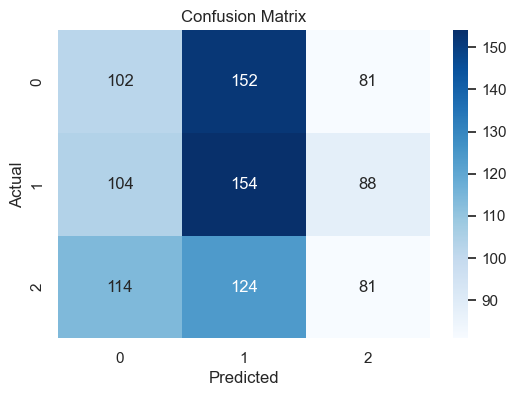

In [102]:
X = X_transformed  
y = df_encoded["Engagement_Level"]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537, stratify=y)


best_svm = SVC()
best_svm.fit(X_train, y_train)


y_pred = best_svm.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1)
)


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [103]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang akan diuji
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV untuk mencari kombinasi terbaik
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Model terbaik
best_svm = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Accuracy: 0.34574999999999995
